In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Open ai introductinoi

In [43]:
import gym

In [44]:
env = gym.make('MsPacman-v0')

In [45]:
# the environemnt is initialised by reset method
obs = env.reset()

In [46]:
# observation vary depending on the nevironemnt
# in this case it is an RGB image represented as a 3D nUmpy array
# of shape [width, height, channels]

obs.shape

(210, 160, 3)

In [47]:
# an environemnt can be visualized by calling its render() method
# in this examplewe will set the mode="rgb_array"

img = env.render(mode="rgb_array")


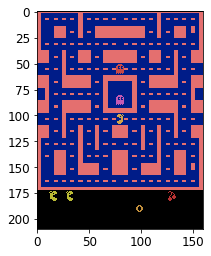

In [48]:
from IPython import display
%matplotlib inline
plt.figure(figsize=(5,4))
for i in range(25):
    plt.imshow(img)
    display.display(plt.gcf())    
    display.clear_output(wait=True)

In [49]:
(img == obs).all()

True

In [2]:
# helper function to plot th eenvironment
def plot_environment(env, figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [51]:
env.action_space
# Discrete(9) means that the possible actions are integers 0 through 8, which represents the 9 possible positions of the joystick (0=center, 1=up, 2=right, 3=left, 4=down, 5=upper-right, 6=upper-left, 7=lower-right, 8=lower-left).

Discrete(9)

In [52]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

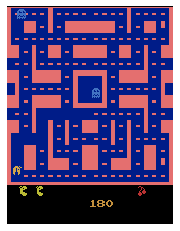

In [53]:
#plot_environment(env)

In [54]:
# the step function
obs, reward , done, info =env.step(0)

In [55]:
obs.shape

(210, 160, 3)

In [56]:
reward

0.0

In [57]:
done
# when game is over done returns true

False

In [58]:
info
# its an environemtn specific dictionary that can provide some extra info about the
# internal state of environment,

{'ale.lives': 3}

In [59]:
# playing one full game with 3 lives
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()

for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [3]:
# to show the animation
def update_scene(num,frames,patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    for f in frames:
        plt.imshow(f)
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)

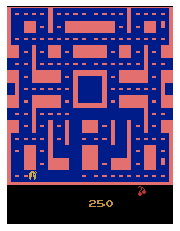

In [61]:
#plot_animation(frames)

In [62]:
env.close()

## Cartpole rendering

In [63]:
# trying a differne tpproach for rendering 
# answer taken from
# https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only

In [4]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

In [5]:
env = gym.make('CartPole-v0')
obs = env.reset()

In [66]:
obs

array([ 0.01911864,  0.00549671, -0.01746714,  0.00916598])

In [67]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering=True
except Exception:
    openai_cart_pole_rendering=False

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        # rendering forcart pole environment
        # so badass ageron
        print("self rendering")
        img_w = 600
        img_h = 400
        cart_w = img_w //12
        cart_h = img_h //15
        pole_len = img_h //3.5
        ple_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255,255,255)
        cart_col = 0x000000
        pole_col = 0x669acc
        
        pos,vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x, cart_y - cart_h // 2, top_pole_x,top_pole_y ), fill=pole_col, width=pole_w)
        draw.line((cart_x, cart_y - cart_h//2, top_pole_x, top_pole_y ), fill=pole_col, width=pole_w)
        return np.array(img)

def plot_cart_pole(env,obs):
    plt.close()
    image = render_cart_pole(env, obs)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

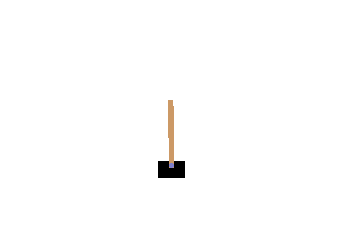

In [68]:
plot_cart_pole(env, obs)

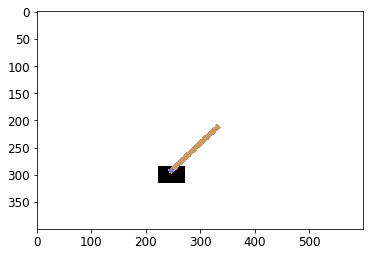

In [69]:
# the other way of rendering cartpole

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

# doesntwork that well because it leaves a dead kernel 
# when we close the other window
# so dont close

In [70]:
env.action_space

Discrete(2)

(-0.5, 599.5, 399.5, -0.5)

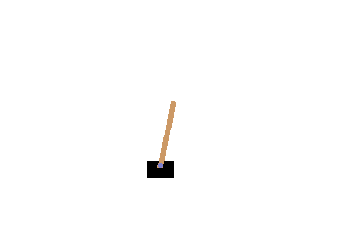

In [71]:
# for cartpole each observation is a 1D array containing 4 floats
# representing the carts horizontal position, angle of pole and the horizontal and angular velocity

# to use render to return image as anarray we can use
# env.render("rgb_array")

# cartpole has only two possible actions accelerate towards left or towards right
# accelerating left till pole falls
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

plt.close()
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

# notice that the game fails when it tilts toot muc
# and not when it actually falls

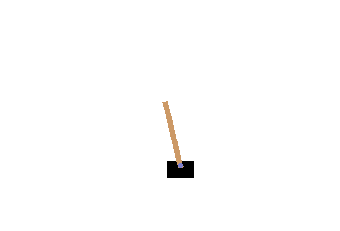

In [72]:
# lets pushto right
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break
plot_cart_pole(env, obs)

### A simple policy
If tilting to left push right otherwise left

In [73]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env,obs)
    frames.append(img)
#     plt.imshow(img)
#     display.display(plt.gcf())    
#     display.clear_output(wait=True)
    # hard coded policy
    position, velocity, angle, angular_velocity = obs
    if angle<0:
        action = 0
    else:
        action =1
    
    obs, reward, done , info = env.step(action)
    if done:
        break

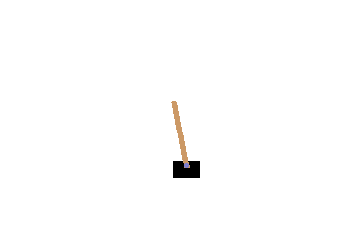

In [74]:
plot_animation(frames)
#system is unstable

In [7]:
# lets create a neral network that will take observation as inputs and output the action to take for
# each observation. To choose an action the network will first estimate
# a probability for each action then select an action randomly according to etimated probabilities
# in case of cart pole environment
# there are two action left or right so we onyl need one output neuton
# it will output a p probability of p and 1 - p will be the probability for the right

import tensorflow as tf

# specify the network architechture
n_inputs = 4 # == env.observation_space.shape[0]
n_hidden = 4 # it a simple task, we dont need more than this
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.variance_scaling_initializer()

# build the network
X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer = initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.elu,
                          kernel_initializer=initializer)
# if there were more twopossible actions we would have used softmax

# 3 select a random action based on estimated probailities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1- outputs])
# print(outputs)
# print(p_left_and_right)
# print("log: ", tf.log(p_left_and_right))

"""
Lastly, we call the multinomial() function to pick a random action. This func‐
tion independently samples one (or more) integers, given the log probability of
each integer. For example, if you call it with the array [np.log(0.5),
np.log(0.2), np.log(0.3)] and with num_samples=5, then it will output five
integers, each of which will have a 50% probability of being 0, 20% of being 1,
and 30% of being 2. In our case we just need one integer representing the action
to take. Since the outputs tensor only contains the probability of going left, we
must first concatenate 1-outputs to it to have a tensor containing the probability
of both left and right actions. Note that if there were more than two possible
actions, the neural network would have to output one probability per action so
you would not need the concatenation step
"""

action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()


Tensor("dense_3/Elu:0", shape=(?, 1), dtype=float32)
Tensor("concat_1:0", shape=(?, 2), dtype=float32)
log:  Tensor("Log_2:0", shape=(?, 2), dtype=float32)


"\nin thsi particular env, the apst actions and observation can be safely ignored\nsince each observation contains the environment full state. If there were some hidden state\nthen you may need to consider past actions and observations in order to try ot\ninfer the hidden state of the environemtn for example if environment only reveealed the position and not the velocit\nwe would have to consider past and presnt.\n\nanother exampleis if observations are noisy\n\nwe are picking one random action \nYou may wonder why we are picking a random action \nbased on the probability given by the policy network,\nrather than just picking the action with the highest probability. \nThis approach lets the agent find the right balance between exploring new actions and exploiting the actions \nthat are known to work well. \nHere's an analogy: suppose you go to a restaurant for the first time, \nand all the dishes look equally appealing so you randomly pick one. If it turns out to be good, you can incre

In [77]:
# randomly playing onegame
# without training the network

n_max_steps = 1000
frames = []
with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1,n_inputs )})
        # this line choses the action with most probability at 0,0
        
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
env.close()

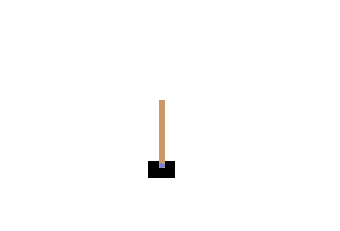

In [78]:
plot_animation(frames)

In [79]:
# training theneural network

import tensorflow as tf
import numpy as np

tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

n_inputs = 4
n_hidden = 4
n_outputs = 1

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32,shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer )
logits = tf.layers.dense(hidden,n_outputs)
outputs =tf.nn.sigmoid(logits)
# probability of 0 is left

p_left_and_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)
# wtf is this p_left_and_right

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [80]:
n_environments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_environments)]
observations = [env.reset() for env in envs]

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations]) 
        # if angle<0 we want proba(left)=1., or else proba(left)=0.
        action_val, _ = sess.run([action, training_op], feed_dict={X: np.array(observations), y: target_probas})
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess, "./my_policy_net_basic.ckpt")

for env in envs:
    env.close()

In [81]:
def render_policy_net(model_path, aciton, X, n_max_steps=1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X:obs.reshape(1, n_inputs )})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames
    

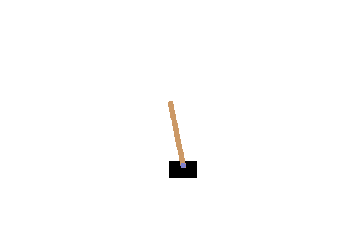

In [82]:
frames =render_policy_net("./my_policy_net_basic.ckpt", action, X)
plot_animation(frames)

### Policy gradients

In [83]:
"""
we need to define the target probabilities y
If an action is good we must increaseits probability
and if its bad then decrease its probability. But how do we know if
an action is good or bad
The problem is that most actions hae delayed effects so 
if we win and lose points in a game
it is not clear whcic actions have delayed effects so when we los and win it si
not clear that which actions cnotributed to us winning so theis is called credit assignment problem

The policy gradients algorithm takckles this problem by first playing
multiple games then making the action isngood games sloghltr more likely while actions in bad
games are made slightly less likely
fiirst we plat then we go back and thngk what we did right and bad
"""

import tensorflow as tf

tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

n_inputs = 4 # no of states of the environment
n_hidden =4
n_outputs = 1 #only one action selected

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32,shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden,activation=tf.nn.elu,
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1,values=[outputs, 1-outputs])
action  = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
# since we are saying the left is the desired action


cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)

# we are using compute gradients instead of minimizing loss
# compute _gradients returns a list of gradient vecot/ variable pairs (one pair per traineable variable)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

# putting all the gradients in a list
gradients = [grad for grad, variable in grads_and_vars]

# during the execution part the algoritm will run the policy and at each step evaluate theier values
# after a number of episodes it will tweak the values
# and then compute the mean of tweaked gradients as explained earlier
# and wwe compute thte mean of tweaked gradients
gradients_placeholders = []
grads_and_vars_feed = []

# we need one placeholder  per gradient vector
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))

# apply _gradients to do the training op
# instead of giving it the original vectors we will give it updated vectors
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [84]:
# function to return the total discounted rewards 
# given raw rewards
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

# discount and normalize rewards as the name says
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards -reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

In [85]:
discount_rewards([10,0,-50],discount_rate=0.8)

array([-22., -40., -50.])

In [86]:
discount_and_normalize_rewards([[10,0,-50], [10,20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [87]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 250
save_iterations = 10
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")

Iteration: 0

IndexError: list index out of range

In [ ]:
env.close()

In [ ]:
frames = render_policy_net("./my_policy_net_pg.ckpt", action,X, n_max_steps=1000 )
plot_animation(frames)

# Markov chains

In [ ]:
transition_probabilities = [
    [0.7, 0.2, 0.0,0.1],
    [0.0,0.0,0.9,0.1],
    [0.0,1.0,0.0,0.0],
    [0.0,0.0,0.0,1.0],
]

n_max_steps = 50

def print_sequence(start_state=0):
    current_state = start_state
    print("States:", end=" ")
    for step in range(n_maX_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
        else:
            print("...",end="")
        print()

for _ in range(10):
    print_sequence()
        

# Markov decision process

In [ ]:
transition_probabilities = [
    [[0.7,0.3,0.0], [1.0,0.0,0.0], [0.8,0.2,0.0]],
    [[0.0,1.0,0.0], None, [0.0,0.0,1.0]],
    [None,[0.8,0.1,0.1], None],
]

rewards = [
    [[+10,0,0],[0,0,0],[0,0,0]],
    [[0,0,0],[0,0,0],[0,0,-50]],
    [[0,0,0],[+40,0,0],[0,0,0]],
]

possible_actions = [[0,1,2],[0,2],[1]]

def policy_fire(state):
    return [0,2,1][state]

def policy_random(state):
    return np.random.choice(possible_actions[state])

def policy_safe(state):
    retunr [0,0,1][state]

def MDPEnvironement(object):
    def __init__(self, start_stae=0):
        self.start_state = start_state
        self.reset()
    def reset(self):
        self.total_rewards = 0
        self.state = self.start_state
    def step(self,action):
        next_state = np.random.choice(range(3), p=transition_probabilities[self.state][action])
        reward = rewards[self.state][action][next_state]
        self.state = next_state
        self.total_rewards += reward
        return self.state, reward
    
def run_rpisode(policy, n_steps,start_state=0, display=True):
    env = MDPEnvironment()
    if display:
        print("states (+rewards): ", end=" ")
    for step in range(n_steps):
        if display:
            if step == 10:
                print("...", end=" ")
            elif step < 10:
                print(env.state, end=" ")
        action = policy(env.state)
        state, reward = env.step(action)
        if display and step <10:
            if reward:
                print("({})".format(reward), end=" ")
    if display:
        print("Total rewards = ", env.total_rewards)
    return env.total_rewards

for policy in (policy_fire, policy_random,policy_safe):
    all_totals = []
    print(policy.__name__)
    for episode in range(1000):
        all_totals.append(run_episode(policy, n_steps=100, display=(episode<5)))
    print("Summary: mean={:.1f},std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals),np.max(all_totals) ))
    print()